# Parte 1: Análisis de Datos y Modelación Bio-económica

In [1]:
#librerias utilizadas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from tabulate import tabulate

In [2]:
file = 'PRUEBA_TECNICA_AREA_DE_BIOECONOMIA.xlsx'
df = pd.read_excel(file,  sheet_name='PARTE_1', skiprows=[0], usecols=lambda x: 'Unnamed' not in x,)
df.head(5)

,Region,Grupo,Unidad,FechaInicial,FechaFinal,N° Mes,Mes Inicio,Estación,Ciclo (Días),Ciclo (Mes),...,%Mort./BKD,Biomasa i,Biomasa f,Biomasa M,BFCR,%PC acc.,Acc. EFCR,Product.1,Product.2,Eficiencia
0,XI,STRAIN_C,MA01-101,2020-09-22,2021-10-31,9,SEP,Primavera,405,13.315054,...,0.0,5758.640800,191007.000125,4365.991187,1.289284,0.011811,1.319671,3.867478,0.290459,0.220100
1,XI,STRAIN_D,MA01-102,2020-09-22,2021-10-31,9,SEP,Primavera,405,13.315054,...,0.0,4943.738800,197454.300007,3834.620943,1.246051,0.011982,1.270872,3.998022,0.300263,0.236266
2,XI,STRAIN_D,MA01-103,2020-09-22,2021-10-31,9,SEP,Primavera,405,13.315054,...,0.0,4324.993068,168838.400046,4566.091607,1.255323,0.011849,1.290164,4.089582,0.307140,0.238063
3,XI,STRAIN_D,MA01-104,2020-09-22,2021-10-25,9,SEP,Primavera,399,13.117794,...,0.0,3301.298000,143798.500133,3283.761512,1.310737,0.012863,1.341372,4.360173,0.332386,0.247796
4,XI,STRAIN_D,MA01-105,2020-09-25,2021-10-31,9,SEP,Primavera,402,13.216424,...,0.0,4737.000000,140662.199906,7823.446895,1.348374,0.012757,1.425983,2.969436,0.224678,0.157560


In [3]:
#nombre de las columnas
print(df.columns)
print(df.shape)

Index(['Region', 'Grupo', 'Unidad', 'FechaInicial', 'FechaFinal', 'N° Mes',
       'Mes Inicio', 'Estación', 'Ciclo (Días)', 'Ciclo (Mes)', 'Número Smolt',
       'Peso Smolt (g)', 'Número Final', 'Peso Final (g)',
       'Total Alimento (Kg)', 'N°Muertos', 'N° Mort. SRS', 'N° Mort. BKD',
       'Temperatura (°C)', 'UTAS', 'Peso Promedio (g)', 'Acc. SGR (%)',
       'Acc. GF3', 'Acc. Mort.%', '%Mort./SRS', '%Mort./BKD', 'Biomasa i',
       'Biomasa f', 'Biomasa M', 'BFCR', '%PC acc.', 'Acc. EFCR', 'Product.1',
       'Product.2', 'Eficiencia'],
      dtype='object')
(684, 35)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region               684 non-null    object        
 1   Grupo                684 non-null    object        
 2   Unidad               684 non-null    object        
 3   FechaInicial         684 non-null    datetime64[ns]
 4   FechaFinal           684 non-null    datetime64[ns]
 5   N° Mes               684 non-null    int64         
 6   Mes Inicio           684 non-null    object        
 7   Estación             684 non-null    object        
 8   Ciclo (Días)         684 non-null    int64         
 9   Ciclo (Mes)          684 non-null    float64       
 10  Número Smolt         684 non-null    int64         
 11  Peso Smolt (g)       684 non-null    float64       
 12  Número Final         684 non-null    int64         
 13  Peso Final (g)       684 non-null  

In [5]:
df.describe()

,N° Mes,Ciclo (Días),Ciclo (Mes),Número Smolt,Peso Smolt (g),Número Final,Peso Final (g),Total Alimento (Kg),N°Muertos,N° Mort. SRS,...,%Mort./BKD,Biomasa i,Biomasa f,Biomasa M,BFCR,%PC acc.,Acc. EFCR,Product.1,Product.2,Eficiencia
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,...,684.000000,684.000000,684.000000,683.000000,683.000000,683.000000,683.000000,684.000000,684.000000,683.000000
mean,7.865497,428.402047,14.084435,40965.178363,139.262421,31112.619883,4853.096572,222152.843532,7868.020468,626.858187,...,0.000318,5687.911838,150550.036131,10361.162491,1.524177,0.013135,1.607458,3.680849,0.273350,0.176563
std,3.651275,70.456807,2.316386,19086.759505,48.562174,16876.241114,961.705588,120531.368404,5919.591188,1082.705243,...,0.001158,3474.145848,93225.898450,8449.721793,0.415392,0.004902,2.782964,1.196610,0.169073,0.079154
min,1.000000,1.000000,0.032877,13937.000000,90.100000,310.000000,125.900000,0.000000,0.000000,0.000000,...,0.000000,1432.977000,1749.500001,477.033923,0.759982,0.006310,-67.247759,0.123920,0.008020,-0.000119
25%,6.000000,415.000000,13.643821,32498.250000,112.000000,16240.750000,4278.886005,131318.000000,3304.500000,102.000000,...,0.000000,3959.033059,78618.749990,4307.456173,1.317973,0.010943,1.382720,2.855018,0.203117,0.119660
50%,9.000000,442.500000,14.547929,42644.000000,129.961960,32224.000000,4892.160185,221909.372500,6412.000000,411.500000,...,0.000000,5145.795935,144392.335970,7737.971387,1.439090,0.011855,1.534603,3.743526,0.268679,0.174346
75%,11.000000,475.000000,15.616421,50000.000000,148.000000,40511.000000,5474.965190,274145.250000,10345.500000,796.250000,...,0.000046,6809.367646,190248.274949,13414.545624,1.603743,0.013118,1.759192,4.503492,0.325436,0.231828
max,12.000000,526.000000,17.293132,107046.000000,528.599060,98253.000000,7358.158320,809041.000000,32641.000000,21076.000000,...,0.014197,24000.000000,601024.999860,46101.917309,5.736373,0.048781,13.154554,7.357097,3.829463,0.597132


### Revisando datos Nan

In [6]:
nan_rows = df[df.isnull().any(1)]
nan_rows.isnull()

C:\Users\earac\AppData\Local\Temp\ipykernel_23328\1575797182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


,Region,Grupo,Unidad,FechaInicial,FechaFinal,N° Mes,Mes Inicio,Estación,Ciclo (Días),Ciclo (Mes),...,%Mort./BKD,Biomasa i,Biomasa f,Biomasa M,BFCR,%PC acc.,Acc. EFCR,Product.1,Product.2,Eficiencia
188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,True


In [7]:
df = df.fillna(df.mean())
nan_rows = df[df.isnull().any(1)]
nan_rows.isnull()

C:\Users\earac\AppData\Local\Temp\ipykernel_23328\3302652005.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\earac\AppData\Local\Temp\ipykernel_23328\3302652005.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())
C:\Users\earac\AppData\Local\Temp\ipykernel_23328\3302652005.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


,Region,Grupo,Unidad,FechaInicial,FechaFinal,N° Mes,Mes Inicio,Estación,Ciclo (Días),Ciclo (Mes),...,%Mort./BKD,Biomasa i,Biomasa f,Biomasa M,BFCR,%PC acc.,Acc. EFCR,Product.1,Product.2,Eficiencia


### Histogramas

In [8]:
#columnas con valores numéricos
columnas_n = ['Ciclo (Días)', 'Número Smolt', 'Peso Smolt (g)', 'Número Final', 'Peso Final (g)', 'N°Muertos', 'Temperatura (°C)', 'Acc. GF3']
#columnas con valores categóricos
columnas_c = ['Grupo', 'Estación']

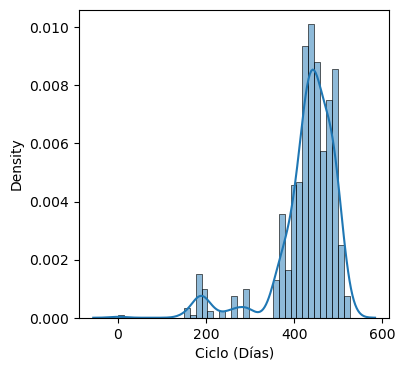

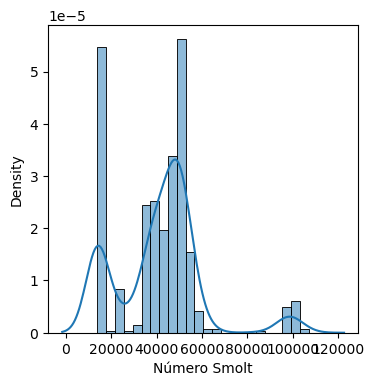

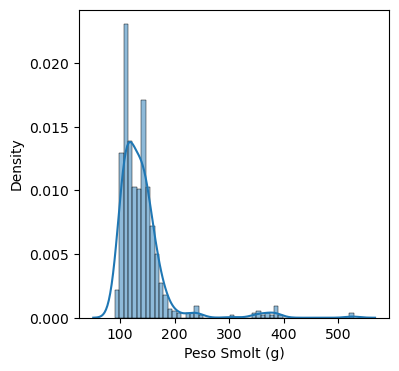

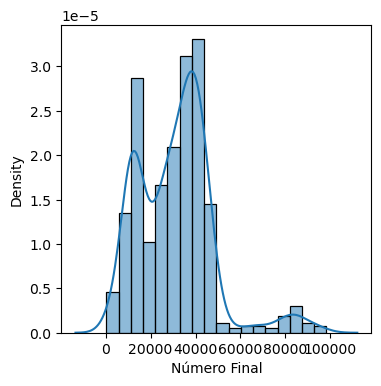

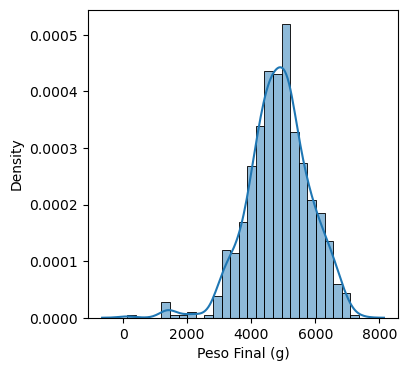

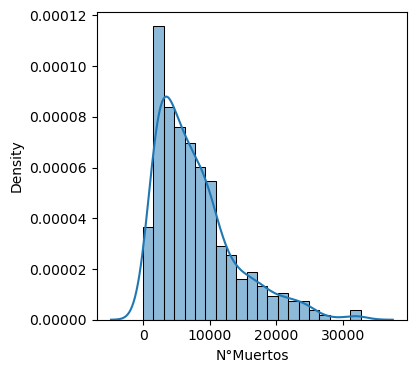

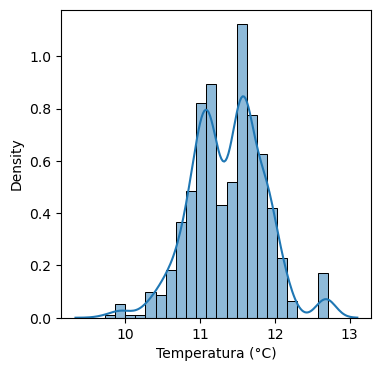

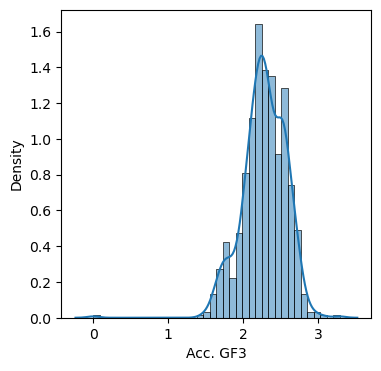

In [9]:
for i, col in enumerate(columnas_n):  
    plt.figure(i, figsize=(4,4))
    sns.histplot(df[col], stat='density', kde=True, kde_kws={"cut": 3})

### ¿Y la correlación? 

<Axes: >

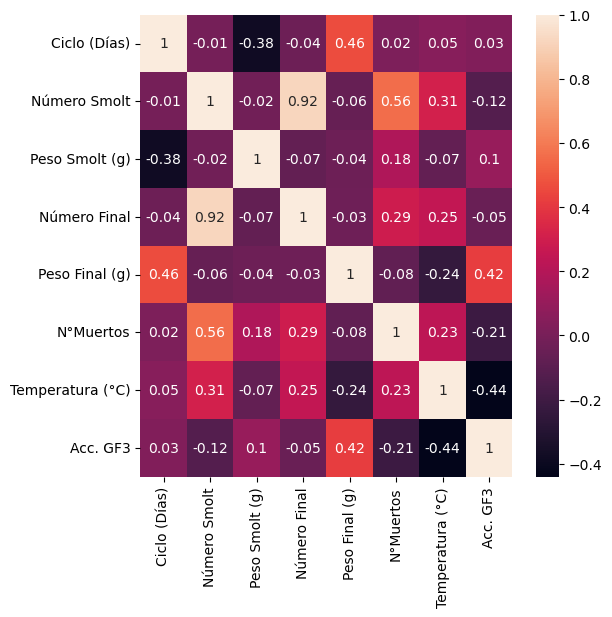

In [10]:
plt.subplots(figsize=(6,6))
correlacion = sns.heatmap(df[columnas_n].corr( ).round(2),annot=True)
correlacion

## Modelo Predictivo

### Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación y división del dataset en datos de entrenamiento y datos de test

In [11]:
#columnas seleccionadas para el modelo
columnas = ['Grupo', 'Estación', 'Ciclo (Días)', 'Número Smolt', 'Peso Smolt (g)', 'Número Final', 'Peso Final (g)', 'N°Muertos',  'Temperatura (°C)', 'Acc. GF3']
data_encoder = pd.get_dummies(df[columnas])

#Código que realice la división en entrenamiento y test

X = data_encoder.drop(columns='Acc. GF3')
y = data_encoder['Acc. GF3']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True) #división 70% train, 30% test

### Ajuste de modelo de Regresión - VM y Random Forest Regressor

In [12]:
#Código de ajuste del modelo 2 - Suport Vector Machine Regressor 
modelo1=svm.SVR(kernel='linear') #se escoge un modelo líneal 
modelo1.fit(x_train, y_train) #entrenamiento de el modelo
modelo1_predicciones_train = modelo1.predict(x_train) #predicciones set de entrenamiento 
modelo1_predicciones_test = modelo1.predict(x_test) #predicciones set de prueba 

In [13]:
#Código para mostrar la evaluación del modelo
#evaluación del set de prueba para el modelo 

MSE = mean_squared_error(y_train, modelo1_predicciones_train)
RMSE_train1 = math.sqrt(MSE) #calculo de error cuadratico medio 
print('MSE RFR - train: ' , RMSE_train1)

r01 = r2_score(y_train, modelo1_predicciones_train.flatten()) #cálculo r^2
print('Coeficiente correlación - train - RFR: ', r01)

print('             ')
#evaluación del set de entrenamiento para el modelo
MSE = mean_squared_error(y_test, modelo1_predicciones_test)
RMSE_test1 = math.sqrt(MSE)#calculo de error cuadratico medio 
print('MSE RFR - test: ' , RMSE_test1)

r02 = r2_score(y_test, modelo1_predicciones_test.flatten()) #cálculo r^2
print('Coeficiente correlación - train - RFR: ', r02)

MSE RFR - train:  158.77721390646326
Coeficiente correlación - train - RFR:  -291215.61622677295
             
MSE RFR - test:  153.70142844248335
Coeficiente correlación - train - RFR:  -297184.99051529856


In [14]:
#Código de ajuste del modelo 1 - Random forest Regressor 
modelo2=RandomForestRegressor(n_estimators=400, criterion='absolute_error') #se escogieron 400 árboles para el modelo 
modelo2.fit(x_train, y_train) #entrenamiento de el modelo
modelo2_predicciones_train = modelo2.predict(x_train) #predicciones set de entrenamiento 
modelo2_predicciones_test = modelo2.predict(x_test) #predicciones set de prueba 

In [15]:
#Código para mostrar la evaluación del modelo
#evaluación del set de prueba para el modelo 

MSE = mean_squared_error(y_train, modelo2_predicciones_train)
RMSE_train2 = math.sqrt(MSE) #calculo de error cuadratico medio 
print('MSE RFR - train: ' , RMSE_train2)

r11 = r2_score(y_train, modelo2_predicciones_train.flatten()) #cálculo r^2
print('Coeficiente correlación - train - RFR: ',r11)

print('             ')
#evaluación del set de entrenamiento para el modelo
MSE = mean_squared_error(y_test, modelo2_predicciones_test)
RMSE_test2 = math.sqrt(MSE)#calculo de error cuadratico medio 
print('MSE RFR - test: ' , RMSE_test2)

r12 = r2_score(y_test, modelo2_predicciones_test.flatten()) #cálculo r^2
print('Coeficiente correlación - train - RFR: ',r12)

MSE RFR - train:  0.04508394726594902
Coeficiente correlación - train - RFR:  0.9765207800908902
             
MSE RFR - test:  0.09960419246943314
Coeficiente correlación - train - RFR:  0.8751962131751528


In [ ]:
#tabla resumen de métricas
info1 = pd.DataFrame({'Parámetro':["RMSE - train", "RMSE- test", "Coeficiente correlación - train", "Coeficiente correlación - test"],
                      'SVM':[RMSE_train1, RMSE_test1, r01, r02], 
                      'RFR':[RMSE_train2, RMSE_test2, r11, r12]}).round(decimals=4)
info1

,Parámetro,SVM,RFR
0,RMSE - train,158.7772,0.0451
1,RMSE- test,153.7014,0.0996
2,Coeficiente correlación - train,-291215.6162,0.9765
3,Coeficiente correlación - test,-297184.9905,0.8752


Text(0.5, 1.0, 'SVM - Test')

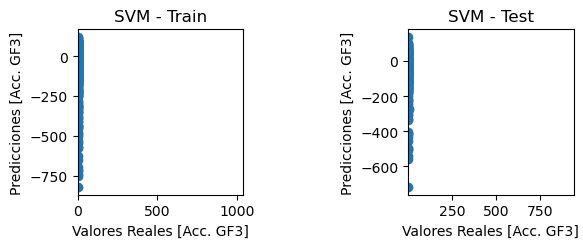

In [17]:
#gráfico de dispersión para el modelo para observar correlación 
plt.subplots_adjust(wspace=1, hspace=2)
#Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, modelo1_predicciones_train)
plt.xlabel('Valores Reales [Acc. GF3]')
plt.ylabel('Predicciones [Acc. GF3]')
plt.axis('equal')
plt.axis('square')
plt.title('SVM - Train')


#modelo de predicción
plt.subplot(1, 2, 2)
plt.scatter(y_test, modelo1_predicciones_test)
plt.xlabel('Valores Reales [Acc. GF3]')
plt.ylabel('Predicciones [Acc. GF3]')
plt.axis('equal')
plt.axis('square')
plt.title('SVM - Test')

Text(0.5, 1.0, 'RFR - Test')

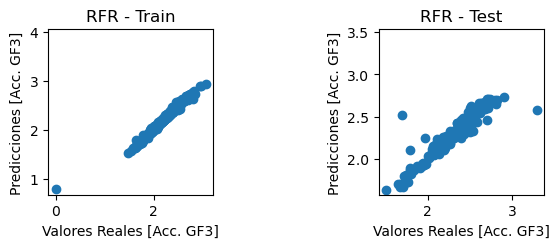

In [18]:
#gráfico de dispersión para el modelo para observar correlación 
plt.subplots_adjust(wspace=1, hspace=2)
#Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, modelo2_predicciones_train)
plt.xlabel('Valores Reales [Acc. GF3]')
plt.ylabel('Predicciones [Acc. GF3]')
plt.axis('equal')
plt.axis('square')
plt.title('RFR - Train')


#modelo de predicción
plt.subplot(1, 2, 2)
plt.scatter(y_test, modelo2_predicciones_test)
plt.xlabel('Valores Reales [Acc. GF3]')
plt.ylabel('Predicciones [Acc. GF3]')
plt.axis('equal')
plt.axis('square')
plt.title('RFR - Test')
